In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [1]:
#Upload data ke Google Colabs
from google.colab import files
uploaded = files.upload()

Saving Sheet1.csv to Sheet1.csv


In [5]:
data = pd.read_csv('Sheet1.csv')

In [6]:
print(data)

            produk  stok  terjual        periode
0      Kemeja Pria   100       50   Januari 2022
1    Sepatu Wanita   200       75   Januari 2022
2  Tas Ransel Anak   150      100   Januari 2022
3      Kemeja Pria    80       60  Februari 2022
4    Sepatu Wanita   180       90  Februari 2022
5  Tas Ransel Anak   100       70  Februari 2022
6      Kemeja Pria    70       80     Maret 2022
7    Sepatu Wanita   160      120     Maret 2022
8  Tas Ransel Anak   120       80     Maret 2022


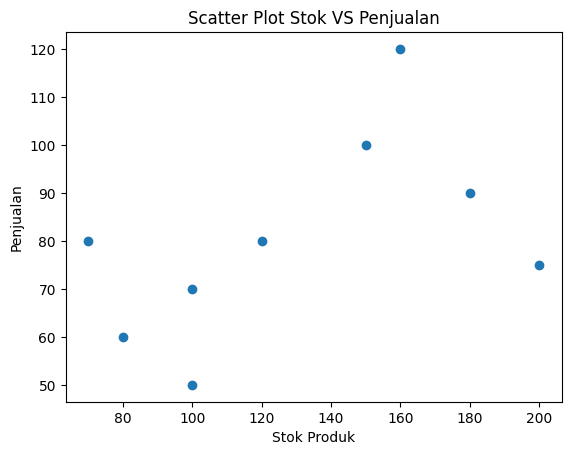

In [7]:
plt.scatter(data['stok'], data['terjual'])
plt.title ('Scatter Plot Stok VS Penjualan')
plt.xlabel ('Stok Produk')
plt.ylabel('Penjualan')
plt.show()

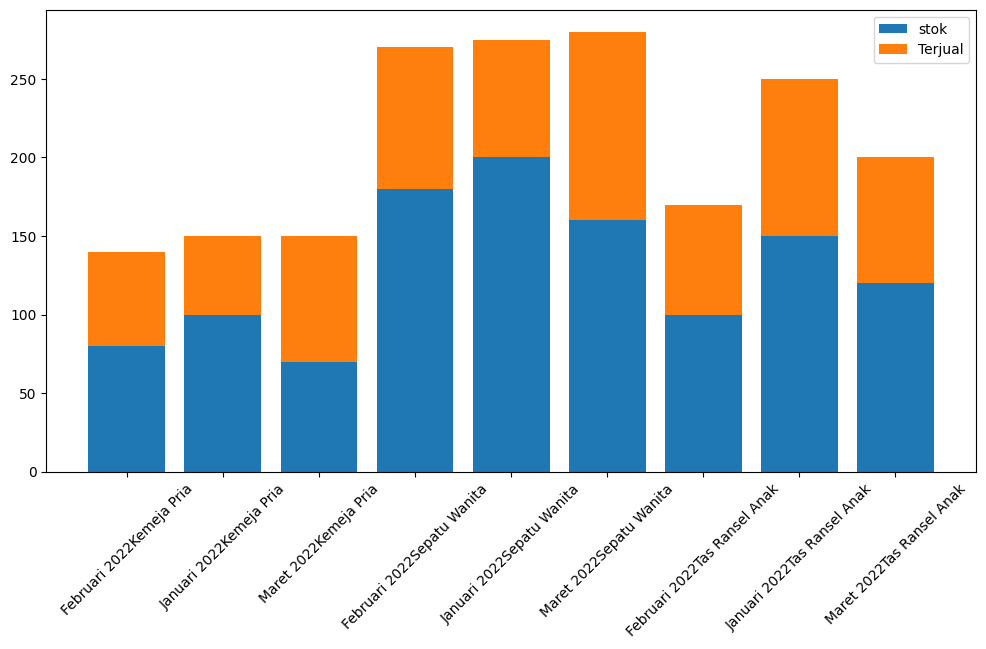

In [8]:
grouped_data = data.groupby(['produk', 'periode']).sum().reset_index()

plt.figure(figsize=(12, 6))
plt.bar(grouped_data['periode'] + grouped_data['produk'], grouped_data['stok'], label= 'stok')
plt.bar(grouped_data['periode'] + grouped_data['produk'], grouped_data['terjual'], bottom=grouped_data ['stok'], label ='Terjual')
plt.xticks(rotation=45)
plt.legend()
plt.show()

<ipython-input-13-ffce3d5dfd5a>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = data.groupby('produk').sum(). reset_index()


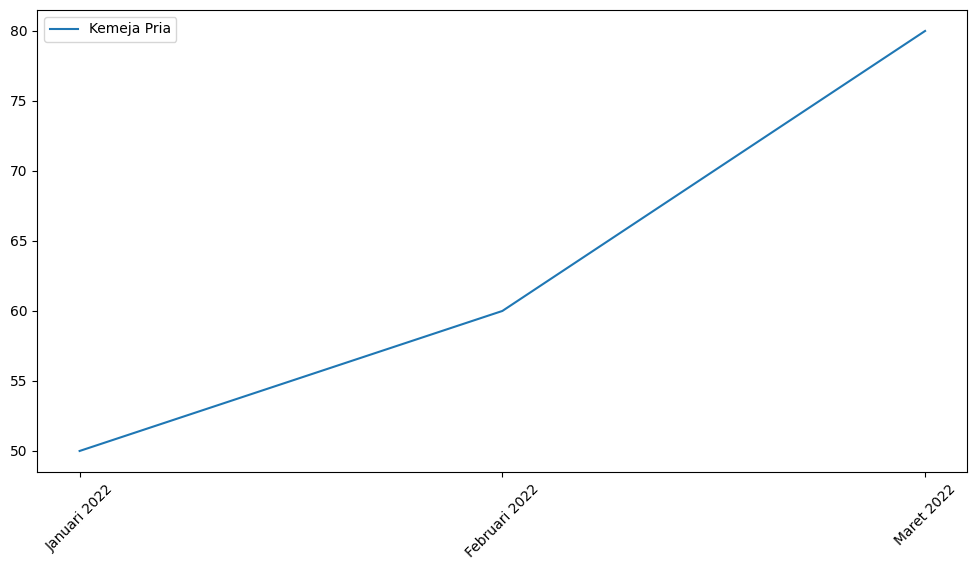

In [13]:
grouped_data = data.groupby('produk').sum(). reset_index()
plt.figure(figsize=(12,6))
plt.plot(data[data['produk'] == 'Kemeja Pria']['periode'], data[data['produk'] == 'Kemeja Pria'] ['terjual'], label='Kemeja Pria')
plt.xticks(rotation=45)
plt.legend()
plt.show()

<ipython-input-17-237401906c64>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = data.groupby('produk').sum(). reset_index()


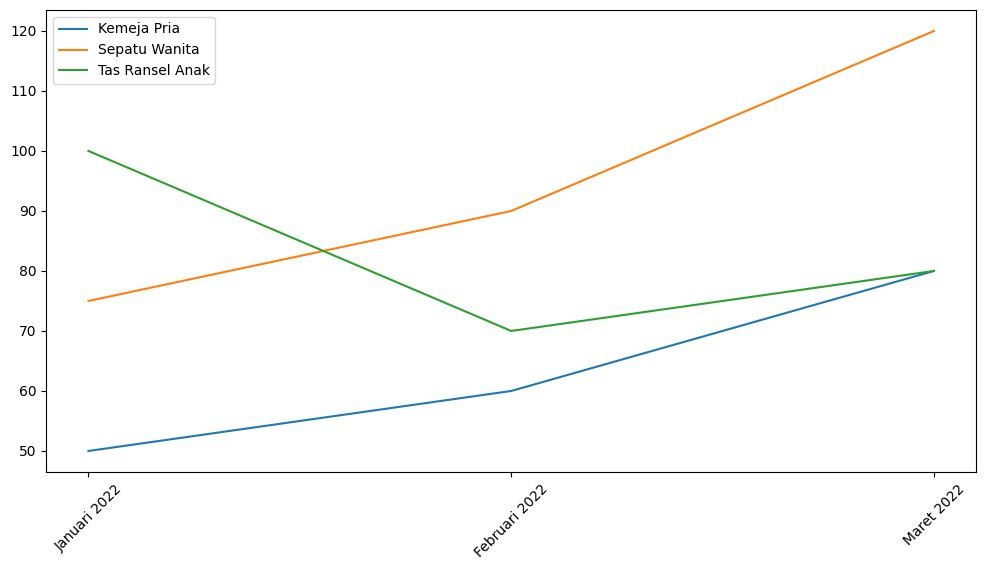

In [17]:
grouped_data = data.groupby('produk').sum(). reset_index()
plt.figure(figsize=(12,6))
plt.plot(data[data['produk'] == 'Kemeja Pria']['periode'], data[data['produk'] == 'Kemeja Pria'] ['terjual'], label='Kemeja Pria')
plt.plot(data[data['produk'] == 'Sepatu Wanita']['periode'], data[data['produk'] == 'Sepatu Wanita'] ['terjual'], label='Sepatu Wanita')
plt.plot(data[data['produk'] == 'Tas Ransel Anak']['periode'], data[data['produk'] == 'Tas Ransel Anak'] ['terjual'], label='Tas Ransel Anak')

plt.xticks(rotation=45)
plt.legend()
plt.show()

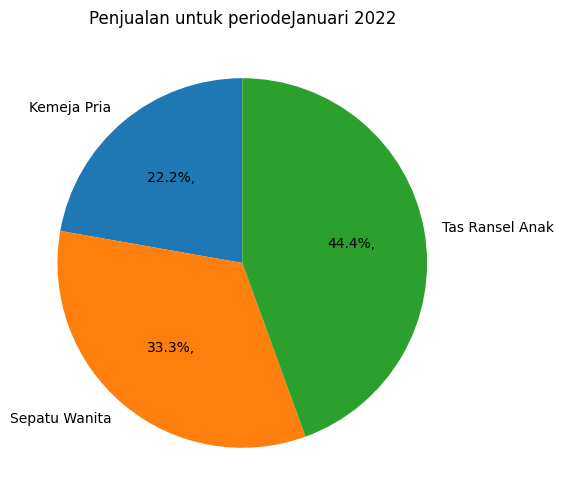

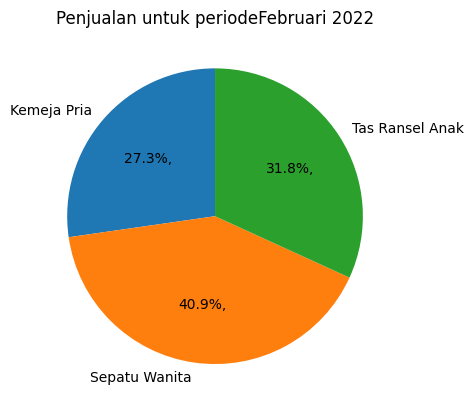

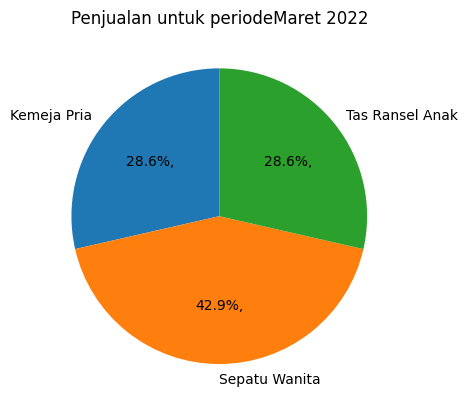

In [19]:
grouped_data = data.groupby(['produk', 'periode']).sum().reset_index()

plt.figure(figsize=(12,6))
for p in set (grouped_data ['periode']):
    data = grouped_data[grouped_data['periode'] == p]
    plt.pie(data['terjual'], labels=data['produk'], autopct='%1.1f%%,', startangle=90)
    plt.title('Penjualan untuk periode' + p)
    plt.show()

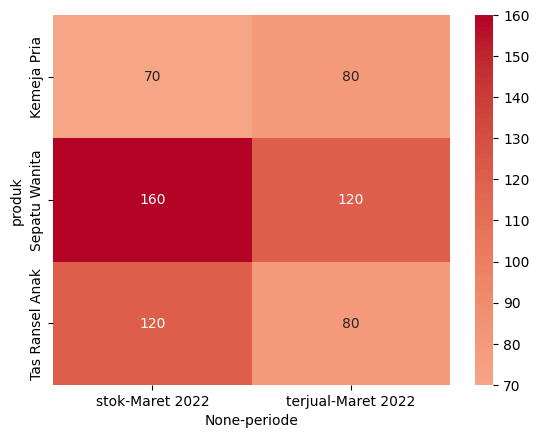

In [25]:
import seaborn as sns

pivot_data = pd.pivot_table(data, values=['stok', 'terjual'], index=['produk'], columns=['periode'])

sns.heatmap(pivot_data, cmap='coolwarm', annot=True, fmt='g', center=0)
plt.show()